# EDA-Project



1. Определить что чаще смотрят люди, фильмы или сериалы?
2. Определить в каких странах Netflix более популярен.
3. Проверить гипотезу, повлиял ли COVID-19 на колличество добавления фильмов или сериалов на платформу.

In [53]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter as ct
from statsmodels.stats.weightstats import ztest
import scipy.stats


In [2]:
data = pd.read_csv('netflix_titles.csv')
data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...
...,...,...,...,...,...,...,...,...,...,...,...,...
6229,80000063,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaN,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
6230,70286564,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaN,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
6231,80116008,Movie,Little Baby Bum: Nursery Rhyme Friends,NaN,NaN,NaN,NaN,2016,NaN,60 min,Movies,Nursery rhymes and original music for children...
6232,70281022,TV Show,A Young Doctor's Notebook and Other Stories,NaN,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaN,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."


In [3]:
data['type'].value_counts()

Movie      4265
TV Show    1969
Name: type, dtype: int64

Text(0.5, 1.0, 'Popular type')

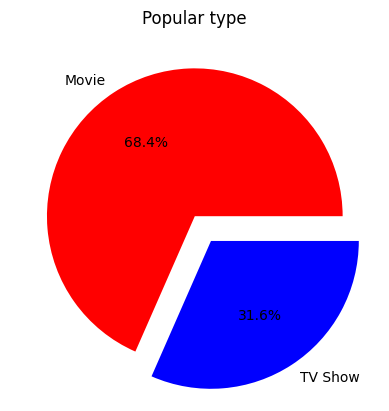

In [4]:
plt.pie(data['type'].value_counts(),autopct=lambda x: f"{x:.1f}%", labels=['Movie','TV Show'], explode=[0,0.2], colors=['Red','blue']);
plt.title('Popular type')

На платформе Netflix находится 68.4% фильмов и доля сериалов составляет 31.6%.

In [5]:
def cleandata(data, column):
    arr = data[column]
    arr = arr.dropna()

    arr = ', '.join(arr)
    arr = arr.replace(',, ',', ')
    arr = arr.split(', ')
    arr = list(ct(arr).items())
    return arr

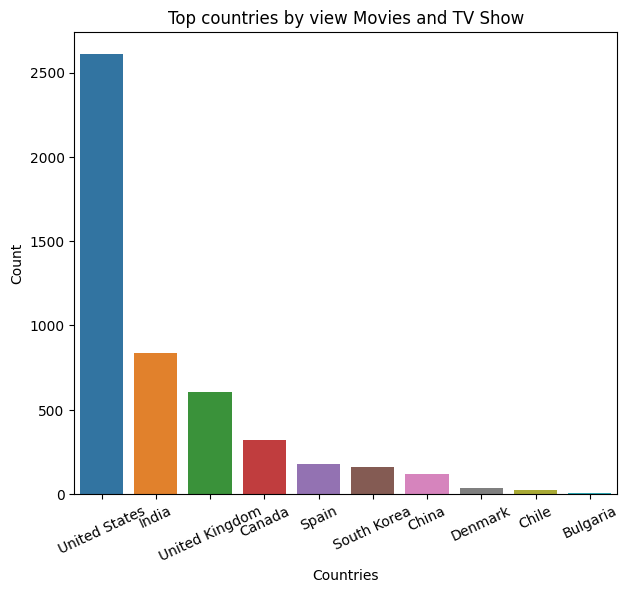

In [6]:
countries = cleandata(data, 'country')
countries_df = countries[0:10]
countries_df = pd.DataFrame(countries_df)
countries_df = countries_df.sort_values(1, ascending=False)
countries_val = countries_df[1]

countries_name = countries_df[0]

fig = plt.figure(figsize=(7,6))
ax = sns.barplot(x = countries_name, y=countries_val);
ax.set(xlabel='Countries', ylabel='Count', title='Top countries by view Movies and TV Show');
plt.xticks(rotation=25);

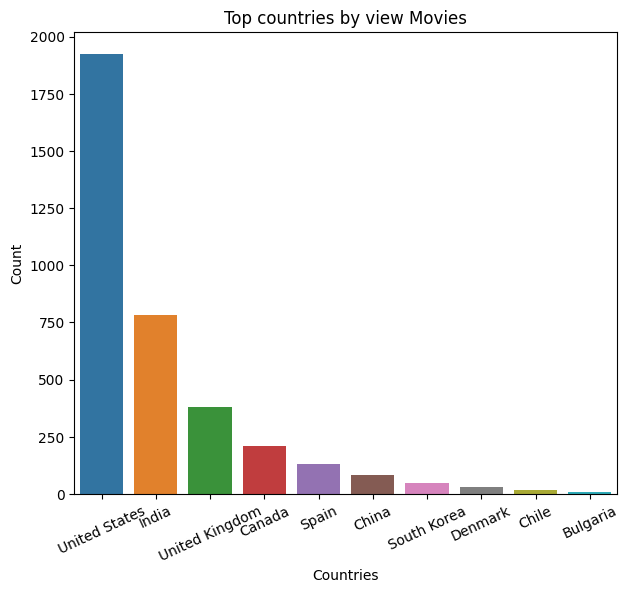

In [7]:
data_top_countries_and_movies = data[data['type']=='Movie']
countries = cleandata(data_top_countries_and_movies, 'country')
countries_df = countries[0:10]
countries_df = pd.DataFrame(countries_df)
countries_df = countries_df.sort_values(1, ascending=False)
countries_val = countries_df[1]
countries_name = countries_df[0]

fig = plt.figure(figsize=(7,6))
ax = sns.barplot(x = countries_name, y=countries_val);
ax.set(xlabel='Countries', ylabel='Count', title='Top countries by view Movies');
plt.xticks(rotation=25);

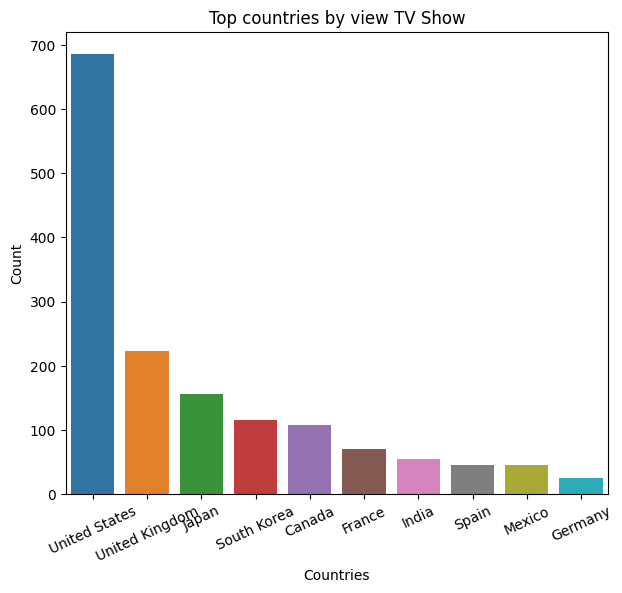

In [8]:
data_top_countries_and_tvshow = data[data['type']=='TV Show']
countries = cleandata(data_top_countries_and_tvshow, 'country')
countries_df = countries[0:10]
countries_df = pd.DataFrame(countries_df)
countries_df = countries_df.sort_values(1, ascending=False)
countries_val = countries_df[1]
countries_name = countries_df[0]

fig = plt.figure(figsize=(7,6))
ax = sns.barplot(x = countries_name, y=countries_val);
ax.set(xlabel='Countries', ylabel='Count', title='Top countries by view TV Show');
plt.xticks(rotation=25);

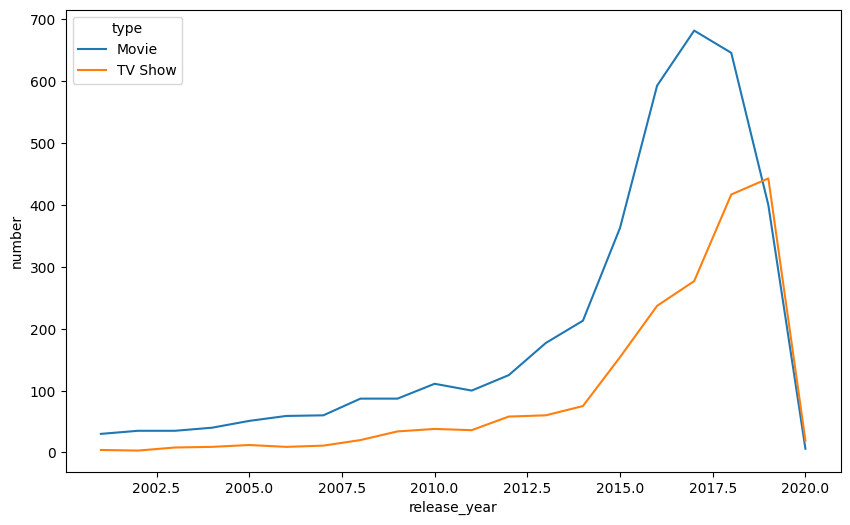

In [72]:
new=random_sample[["type","release_year"]].value_counts().reset_index()
new.columns=["type","release_year","number"]
plt.figure(figsize=(10,6));
sns.lineplot(data=new,x="release_year",y="number",hue="type");

Нулевая гипотеза: COVID-19 не повлиял на добавление новых фильмов и сериалов.

Альтернативная гипотеза: COVID-19 повлиял на добавление фильмов и сериалов на платформу в связи с тем что люди больше сидели дома.

Для проверки гипотез будеть использоваться F-test (Тест Фишера)

In [73]:
random_sample = data[data['release_year']>2000]
random_sample_1=random_sample["release_year"].sample(n=100,random_state=1)
random_sample_2=random_sample["release_year"].sample(n=100,random_state=2)


In [74]:
def f_test(x, y):
    x = np.array(x)
    y = np.array(y)
    f = np.var(x, ddof=1)/np.var(y, ddof=1)
    dfn = x.size-1
    dfd = y.size-1
    p = 1-scipy.stats.f.cdf(f, dfn, dfd)
    return f, p

In [75]:
f_test(random_sample_1, random_sample_2)


(0.833432619693526, 0.8168795020923834)

Значение f-test=0.83, р-value= 0.81.
Из этого следует что p-value > 0.05 и это означает что мы не может отклонить нулевую гипотезу и принимаем альтернативную.
Вывод: COVID-19 не повлиял на тенденцию добавления фильмов, также это можно увидеть на графике начиная с 2010 года наблюдается тенденция раста добавления фильмов на сайт и ковид не сильно повлиял на этот рост.